# <center>Time Series</center>

> Numpy's datetime64

In [2]:
import numpy as np
#encodes date as 64 bit int
date = np.array('2024-07-04', dtype = np.datetime64)

In [3]:
#Quick vectorized operation
date + np.arange(12)

array(['2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07',
       '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
       '2024-07-12', '2024-07-13', '2024-07-14', '2024-07-15'],
      dtype='datetime64[D]')

>Pandas' DatetimeIndex:

In [4]:
import pandas as pd 

In [5]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04','2021-07-04', '2021-08-04'])

In [6]:
data = pd.Series([0, 1, 2, 3], index = index)

In [7]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

> Time Series' Data Structure

In [8]:
#DatetimeIndex
from datetime import datetime
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021', '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [9]:
#PeriodIndex
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [10]:
#TimedeltaIndex -> duration
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [11]:
from analysis_tools.display import Display
Display.display(
    ("8 period Range", pd.date_range('2015-07-03', periods=8)),
    #  FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
    ("8 period Range in Hours ", pd.date_range('2015-07-03', periods=8, freq ='h')),
    ("6 period Duration Range in Hours ", pd.timedelta_range(0, periods=6, freq='2h30min')),
    ("8 period 'PeriodIndex' in Months ", pd.period_range('2015-07', periods=8, freq='M'))
    )

### <center> SECTION 2 </center>
### <center> Resampling, Shifting, and Windowing </center>

In [12]:
from pandas_datareader import data

In [13]:
'''
pandas_datareader Deprecation: As of recent updates, 
Yahoo Finance is no longer natively supported in pandas_datareader due to API changes. 
sp500 = data.DataReader('^GSPC', start='2018', end='2022', data_source='yahoo') #won't work
'''

"\npandas_datareader Deprecation: As of recent updates, \nYahoo Finance is no longer natively supported in pandas_datareader due to API changes. \nsp500 = data.DataReader('^GSPC', start='2018', end='2022', data_source='yahoo') #won't work\n"

In [14]:
# pip install yfinance

import yfinance as yf

# Fetch S&P 500 data using yfinance
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-01-01')

# Display the first few rows of the data
print(sp500.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2018-01-02  2695.810059  2695.889893  2682.360107  2683.729980  3397430000
2018-01-03  2713.060059  2714.370117  2697.770020  2697.850098  3544030000
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3697340000
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3239280000
2018-01-08  2747.709961  2748.510010  2737.600098  2742.669922  3246160000


In [15]:
sp500 = sp500['Close']

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

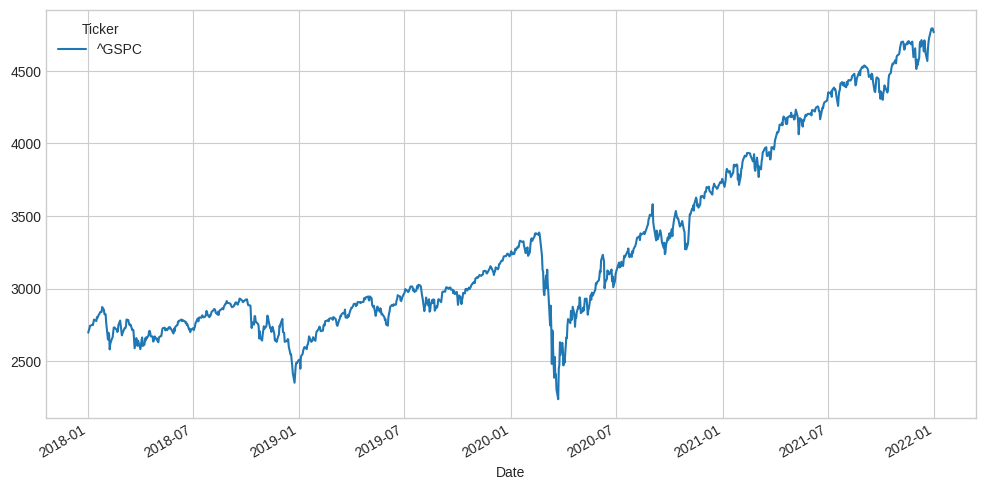

In [17]:
# plt.style.available #... to see available styles
plt.style.use('seaborn-v0_8-whitegrid')
sp500.plot(figsize=(12, 6));

#####  Resampling and Converting Frequencies
> using the `resample` data aggregation method, or the much simpler `asfreq` data selection.

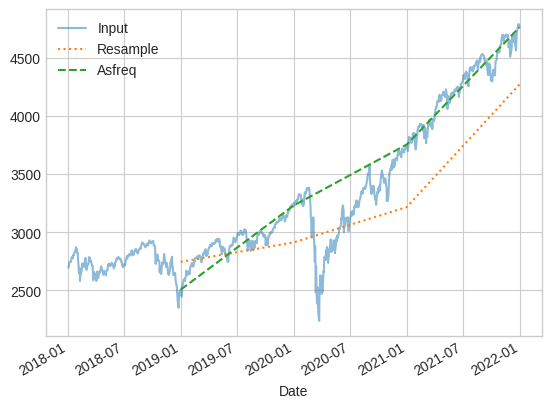

In [18]:
# Assuming sp500 is a pandas Series or DataFrame with a datetime index
fig, ax = plt.subplots()  # Create a single matplotlib Axes object

# /tmp/ipykernel_6937/1138896904.py:8: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
#   sp500.resample('BA').mean().plot(ax=ax, style=':')

# Plot the original data
sp500.plot(ax=ax, alpha=0.5, style='-')

# Plot the resampled (yearly average) data
sp500.resample('BYE').mean().plot(ax=ax, style=':')

# Plot the data as it appears with the annual frequency
sp500.asfreq('BYE').plot(ax=ax, style='--')

# Add a legend to the plot
ax.legend(['Input', 'Resample', 'Asfreq'], loc='upper left')


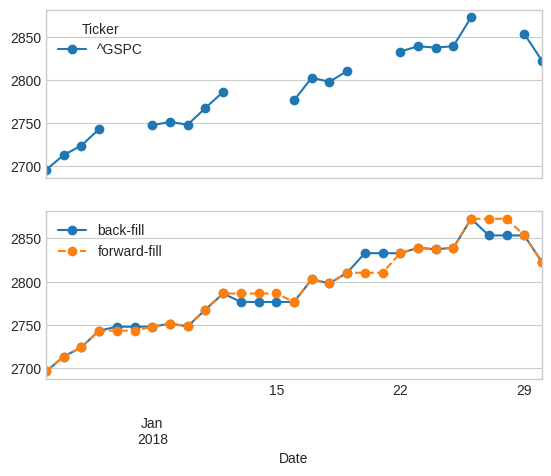

In [19]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

#1st axis

data.asfreq('D').plot(ax = ax[0], marker = 'o')

#2nd axis

data.asfreq('D', method='bfill').plot(ax = ax[1], style = '-o')
data.asfreq('D', method='ffill').plot(ax = ax[1], style = '--o')
ax[1].legend(['back-fill', 'forward-fill']);

> Beacause the S&P 500 only exists for business days, top panel has gaps representing NA values

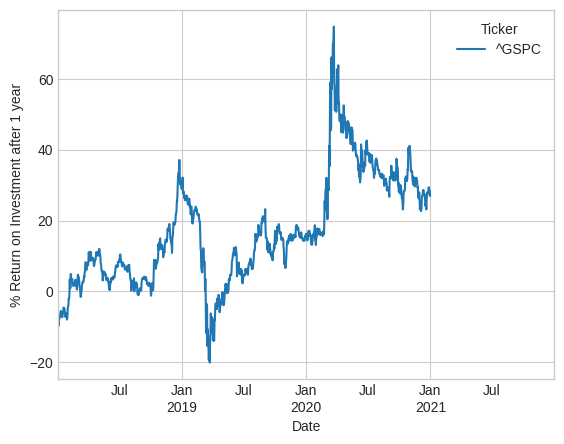

In [20]:
sp500 = sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.dropna()
ROI.plot()
plt.ylabel('% Return on Investment after 1 year');

#### Rolling Windows
> Returns a view similar to what we saw with the groupby operation (see note 4). This operation is similar to the sliding window algorithm <br>
> Aggregations are available for the sample size the widow cotains as it slides through the Dataframe column. <br> 
> Use `sp500.rolling?` for documetation.



In [21]:
sp500.rolling?

Signature:
sp500.rolling(
    window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: 'IntervalClosedType | None' = None,
    step: 'int | None' = None,
    method: 'str' = 'single',
) -> 'Window | Rolling'
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, timedelta, str, offset, or BaseIndexer subclass
    Size of the moving window.

    If an integer, the fixed number of observations used for
    each window.

    If a timedelta, str, or offset, the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.
    To learn more about the offsets & frequency strings, please see `this link
    <https://pandas.pydata.org/pandas-docs/stable/user_gu

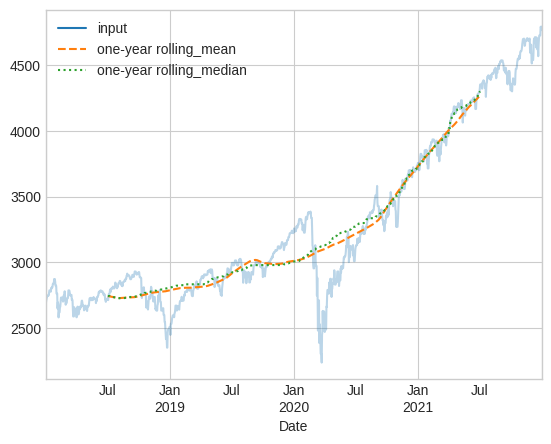

In [32]:
# Extract the column as a Series
sp500_series = sp500['^GSPC']

# Compute the rolling mean and median
rolling = sp500_series.rolling(365, center=True)

# Create a DataFrame with the input and calculated rolling statistics
data = pd.DataFrame({
    'input': sp500_series,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_median': rolling.median()
})
# Plot the data
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3);